In [2]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import optimize, integrate

plt.rcParams.update({'font.size': 16})

**Exercise 1**

(a) Plot the energy density of the 3D electron gas as a function of temperature at fixed chemical potential of
µ = 1 eV. Consider temperatures in the range T ∈ [0 K, 10<sup>4</sup> K].

C:\Users\brend\AppData\Local\Temp\ipykernel_13984\3124851296.py:12: RuntimeWarning: invalid value encountered in scalar divide
  return 1/(np.exp((omega-mu)/(kb*T)) + 1)
C:\Users\brend\AppData\Local\Temp\ipykernel_13984\3124851296.py:12: RuntimeWarning: divide by zero encountered in scalar divide
  return 1/(np.exp((omega-mu)/(kb*T)) + 1)
C:\Users\brend\AppData\Local\Temp\ipykernel_13984\3124851296.py:20: IntegrationWarning: The occurrence of roundoff error is detected, which prevents 
  the requested tolerance from being achieved.  The error may be 
  underestimated.
  result, err = integrate.quad(lambda w: w*f(w, T, mu)*d(w, m), 0, np.inf)
C:\Users\brend\AppData\Local\Temp\ipykernel_13984\3124851296.py:12: RuntimeWarning: overflow encountered in exp
  return 1/(np.exp((omega-mu)/(kb*T)) + 1)


Text(0, 0.5, '$\\epsilon$ (eV nm$^{-3}$)')

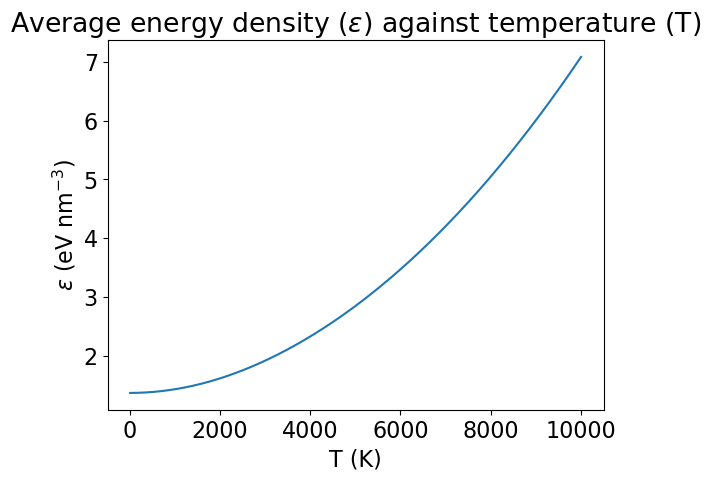

In [3]:
# Constants
m = 1 # electron mass
hbar = 0.276 # nm sqrt(eV electron mass)
mu = 1 # eV
kb = 8.62e-5 # eV/K

Tmin, Tmax, Ts = 0, 10**4, 1000
Tlist = np.linspace(Tmin, Tmax, Ts)

# Fermi-Dirac distribution
def f(omega, T, mu):
    return 1/(np.exp((omega-mu)/(kb*T)) + 1)

# Density of states
def d(omega, m):
    return m**(3/2) * np.sqrt(omega) / (np.sqrt(2) * np.pi**2 * hbar**3)

# Average electron density
def epsilon(T, mu):
    result, err = integrate.quad(lambda w: w*f(w, T, mu)*d(w, m), 0, np.inf)
    return result

epsilon_parta = np.array([epsilon(T, mu) for T in Tlist])

plt.plot(Tlist, epsilon_parta)
plt.title(r'Average energy density ($\epsilon$) against temperature (T)')
plt.xlabel('T (K)')
plt.ylabel(r'$\epsilon$ (eV nm$^{-3}$)')

(b) On the same axes, plot the energy density of the 3D electron gas as a function of temperature at fixed
electron density ρ = 2.27 nm<sup>−3</sup>
. Consider the same temperature range as part (a).


C:\Users\brend\AppData\Local\Temp\ipykernel_13984\3124851296.py:12: RuntimeWarning: divide by zero encountered in scalar divide
  return 1/(np.exp((omega-mu)/(kb*T)) + 1)
C:\Users\brend\AppData\Local\Temp\ipykernel_13984\3124851296.py:12: RuntimeWarning: invalid value encountered in scalar divide
  return 1/(np.exp((omega-mu)/(kb*T)) + 1)
<timed exec>:9: IntegrationWarning: The occurrence of roundoff error is detected, which prevents 
  the requested tolerance from being achieved.  The error may be 
  underestimated.
C:\Users\brend\AppData\Local\Temp\ipykernel_13984\3124851296.py:12: RuntimeWarning: overflow encountered in exp
  return 1/(np.exp((omega-mu)/(kb*T)) + 1)


CPU times: total: 1min 25s
Wall time: 1min 41s


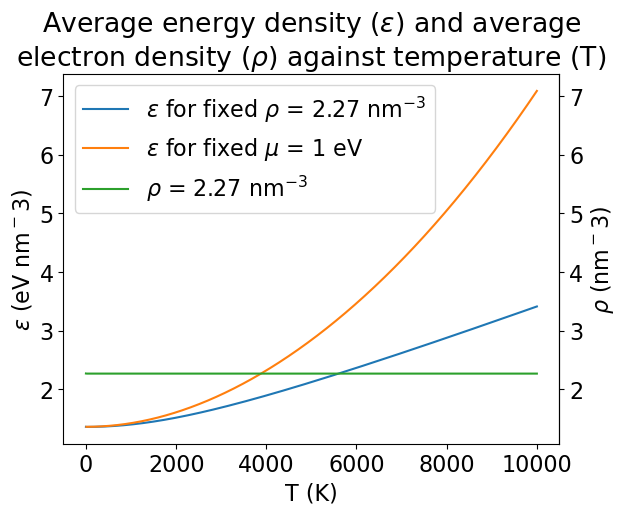

In [46]:
%%time

Tmin, Tmax, Ts = 0, 10**4, 1000
Tlist = np.linspace(Tmin, Tmax, Ts)

mu_max = 2
mu_list = np.array([])

# Average electron density
def rho(T, mu):
    result, err = integrate.quad(lambda w: f(w, T, mu)*d(w, m), 0, np.inf)
    return result

# Make sure to keep constant rho = 2.27 nm^-3

for T in Tlist:
    # Find the value of mu that gives rho = 2.27 nm^-3
    mu = 0
    # initially increase mu by a (relatively) large amount
    dmu = 0.1
    while mu <= mu_max:
        # check if rho has surpassed 2.27 nm^-3
        if rho(T, mu) >= 2.27:
            # check if step size is small enough to stop
            if dmu >= 1e-5:
                # if not go back to last mu which gives rho < 2.27 nm^-3
                mu -= dmu
                # decrease dmu then repeat
                dmu = dmu/2
            elif rho(T, mu) == 2.27:
                # check if rho is bang on 2.27 nm^-3
                mu_list = np.append(mu_list, mu)
                break
            else:
                # Check whether the estimate one step above or below is closer to 2.27 nm^-3 and save the appropriate value
                above = rho(T, mu) - 2.27
                below = rho(T, mu-dmu) - 2.27
                if np.abs(above) < np.abs(below):
                    mu_list = np.append(mu_list, mu)
                else:
                    mu_list = np.append(mu_list, mu-dmu)
                break
        else:
            # increase mu and repeat at this temperature
            mu += dmu

T_mu = np.array([Tlist, mu_list])

rhos = np.array([rho(T_mu[0,i], T_mu[1,i]) for i in range(len(T_mu[0]))])
epsilon_partb = np.array([epsilon(T_mu[0,i], T_mu[1,i]) for i in range(len(T_mu[0]))])


fig, ax = plt.subplots()

plt.plot(Tlist, epsilon_partb, label=r'$\epsilon$ for fixed $\rho$ = 2.27 nm$^{-3}$')
plt.plot(Tlist, epsilon_parta, label=r'$\epsilon$ for fixed $\mu$ = 1 eV')
plt.plot(Tlist, rhos, label=r'$\rho$ = 2.27 nm$^{-3}$')
plt.title(r'Average energy density ($\epsilon$) and average''\n'r'electron density ($\rho$) against temperature (T)')
plt.xlabel('T (K)')
plt.ylabel(r'$\epsilon$ (eV nm$^-3$)')
secy = ax.secondary_yaxis('right')
secy.set_ylabel(r'$\rho$ (nm$^-3$)')
plt.legend()

The same as above, but it checks whether the value higher or lower than 2.27 nm$^{-3}$ is closer and acts accordingly.

It actually turns out that the added comlexity causes it to run slower

C:\Users\brend\AppData\Local\Temp\ipykernel_13984\3124851296.py:12: RuntimeWarning: divide by zero encountered in scalar divide
  return 1/(np.exp((omega-mu)/(kb*T)) + 1)
C:\Users\brend\AppData\Local\Temp\ipykernel_13984\3124851296.py:12: RuntimeWarning: invalid value encountered in scalar divide
  return 1/(np.exp((omega-mu)/(kb*T)) + 1)
<timed exec>:11: IntegrationWarning: The occurrence of roundoff error is detected, which prevents 
  the requested tolerance from being achieved.  The error may be 
  underestimated.
C:\Users\brend\AppData\Local\Temp\ipykernel_13984\3124851296.py:12: RuntimeWarning: overflow encountered in exp
  return 1/(np.exp((omega-mu)/(kb*T)) + 1)


CPU times: total: 2min 3s
Wall time: 2min 29s


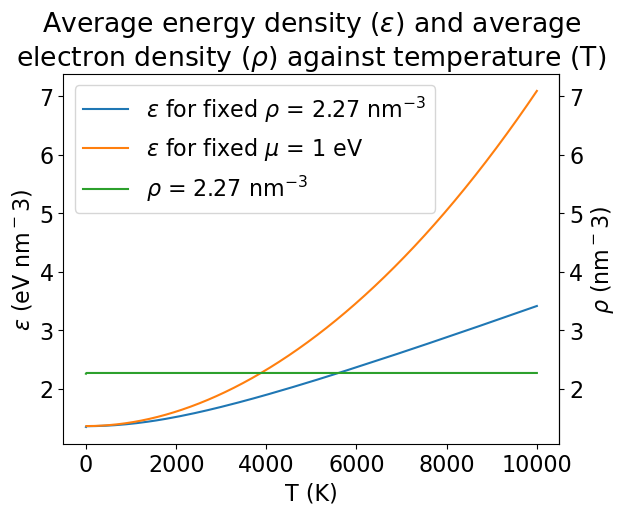

In [47]:
%%time
Tmin, Tmax, Ts = 0, 10**4, 1000
Tlist = np.linspace(Tmin, Tmax, Ts)

mu_max = 2
mu_list = np.array([])

# Average electron density
def rho(T, mu):
    result, err = integrate.quad(lambda w: f(w, T, mu)*d(w, m), 0, np.inf)
    return result

# Make sure to keep constant rho = 2.27 nm^-3
increasing = True # We are increasing mu at first

for T in Tlist:
    increasing = True # We are increasing mu at first
    # Find the value of mu that gives rho = 2.27 nm^-3
    mu = 0
    # initially increase mu by a (relatively) large amount
    dmu = 0.1
    while mu <= mu_max:
        if increasing == True:
            # check if rho has surpassed 2.27 nm^-3
            if rho(T, mu) >= 2.27:
                # check if step size is small enough to stop
                if dmu >= 1e-5:
                    # Check whether the estimate one step above or below is closer to 2.27 nm^-3 and save the appropriate value
                    above = rho(T, mu) - 2.27
                    below = rho(T, mu-dmu) - 2.27
                    if np.abs(above) < np.abs(below):
                        increasing = False
                    else:
                        increasing = True
                        # go back to last mu which gives rho < 2.27 nm^-3
                        mu -= dmu
                    # decrease dmu then repeat
                    dmu = dmu/2
                elif rho(T, mu) == 2.27:
                    # check if rho is bang on 2.27 nm^-3
                    mu_list = np.append(mu_list, mu)
                    break
                else:
                    # Check whether the estimate one step above or below is closer to 2.27 nm^-3 and save the appropriate value
                    above = rho(T, mu) - 2.27
                    below = rho(T, mu-dmu) - 2.27
                    if np.abs(above) < np.abs(below):
                        mu_list = np.append(mu_list, mu)
                    else:
                        mu_list = np.append(mu_list, mu-dmu)
                    break
            else:
                # increase mu and repeat at this temperature
                mu += dmu
        else:
            # check if rho has is below 2.27 nm^-3
            if rho(T, mu) <= 2.27:
                # check if step size is small enough to stop
                if dmu >= 1e-5:
                    # Check whether the estimate one step above or below is closer to 2.27 nm^-3 and save the appropriate value
                    above = rho(T, mu+dmu) - 2.27
                    below = rho(T, mu) - 2.27
                    if np.abs(above) < np.abs(below):
                        increasing = False
                        # go back to last mu which gives rho > 2.27 nm^-3
                        mu += dmu
                    else:
                        increasing = True
                    # decrease dmu then repeat
                    dmu = dmu/2
                elif rho(T, mu) == 2.27:
                    # check if rho is bang on 2.27 nm^-3
                    mu_list = np.append(mu_list, mu)
                    break
                else:
                    # Check whether the estimate one step above or below is closer to 2.27 nm^-3 and save the appropriate value
                    above = rho(T, mu+dmu) - 2.27
                    below = rho(T, mu) - 2.27
                    if np.abs(above) < np.abs(below):
                        mu_list = np.append(mu_list, mu)
                    else:
                        mu_list = np.append(mu_list, mu-dmu)
                    break
            else:
                # decrease mu and repeat at this temperature
                mu -= dmu

T_mu = np.array([Tlist, mu_list])

rhos = np.array([rho(T_mu[0,i], T_mu[1,i]) for i in range(len(T_mu[0]))])
epsilon_partb = np.array([epsilon(T_mu[0,i], T_mu[1,i]) for i in range(len(T_mu[0]))])


fig, ax = plt.subplots()

plt.plot(Tlist, epsilon_partb, label=r'$\epsilon$ for fixed $\rho$ = 2.27 nm$^{-3}$')
plt.plot(Tlist, epsilon_parta, label=r'$\epsilon$ for fixed $\mu$ = 1 eV')
plt.plot(Tlist, rhos, label=r'$\rho$ = 2.27 nm$^{-3}$')
plt.title(r'Average energy density ($\epsilon$) and average''\n'r'electron density ($\rho$) against temperature (T)')
plt.xlabel('T (K)')
plt.ylabel(r'$\epsilon$ (eV nm$^-3$)')
secy = ax.secondary_yaxis('right')
secy.set_ylabel(r'$\rho$ (nm$^-3$)')
plt.legend()

Text(0.5, 0, 'T (K)')

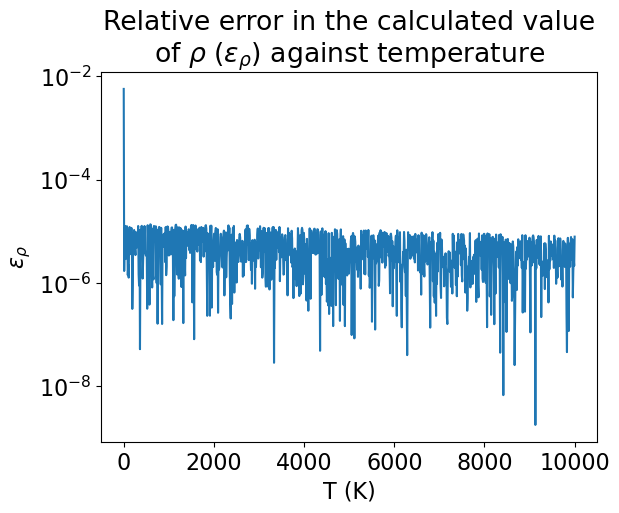

In [43]:
# Relative error in the value of rho
plt.plot(Tlist, np.abs(rhos - 2.27)/rhos)
plt.title(r'Relative error in the calculated value''\n'r'of $\rho$ ($\epsilon_{\rho}$) against temperature')
plt.yscale('log')
plt.ylabel(r'$\epsilon_{\rho}$')
plt.xlabel('T (K)')

**Exercise 2**

(a) First we will consider the case where α is a rational number. Specifically, we will consider three cases:
α = 1, α = 1/2 and α = 1/3. For each value of α, find the eigenvalues and plot them in increasing order.
In addition, find and plot the (unnormalised) density of states (DOS) ν(w), which is defined as the number
of eigenstates within an energy interval w ∈ [w −δw/2, w +δw/2]. Choose parameters L = 500, u = 2ℏλ,
and δw = ℏλ/10.

Let ℏλ = 1

In [6]:
# Define a function to generate the Hamiltonian
def tight_binding(tun, u, a, L):
    values = -tun*np.ones(L-1)
    ls = np.arange(0,L,1)
    
    def epsilon(alpha, l):
        return u*np.cos(2*np.pi*alpha*l)
    
    epsilons = epsilon(a, ls)
    
    H = np.diag(values, 1)
    H += np.diag(values, -1)
    H += np.diag(epsilons, 0)
    return H

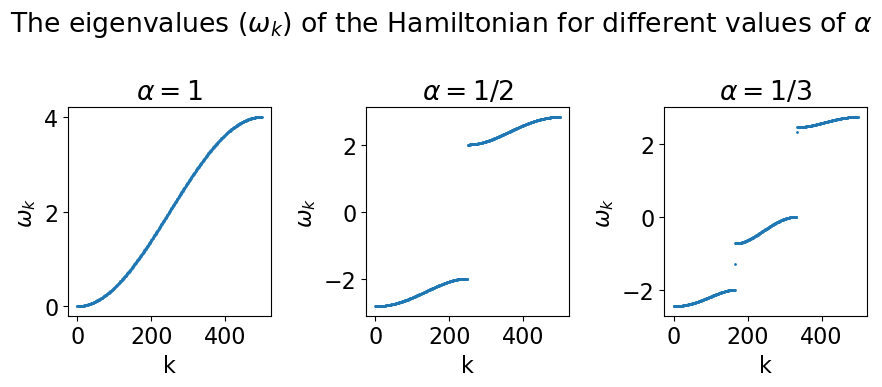

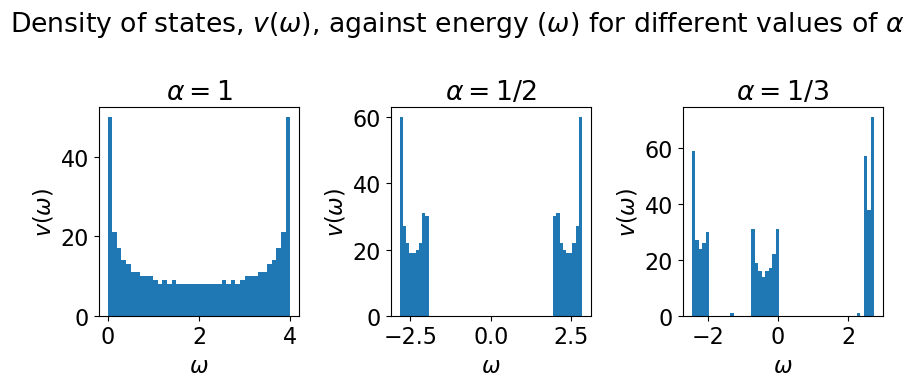

In [18]:
L = 500
u = 2
dw = 1/10

# Find and plot the eigenstates for the different values of alpha
fig, ax = plt.subplots(1, 3, figsize=(9,4))

alpha_list = [1, 1/2, 1/3]
alpha_labels = ['1', '1/2', '1/3']
val_arr = np.empty([3,L])
n_bins = []


for a in range(len(alpha_list)):
    hamiltonian = tight_binding(1, u, alpha_list[a], L)
    
    # Find the eigenvalues and eigenvectors
    vals, vecs = np.linalg.eig(hamiltonian)

    # Sort the eigenvalues in increasing order
    inds = np.argsort(vals)
    vals = vals[inds]
    
    # Store for histogram later
    val_arr[a] = vals
    
    # Plot the eigenvalues
    k = np.arange(0, len(vals), 1)
    fig.suptitle(r'The eigenvalues ($\omega_k$) of the Hamiltonian for different values of $\alpha$')
    ax[a].scatter(k, vals, s=1)
    ax[a].set(title=r'$\alpha = $'+str(alpha_labels[a]), ylabel=r'$\omega_k$', xlabel='k')

    # Divide by the bin width to find the number of bins and store to be plotted separately
    n_bins.append(int((vals[-1]-vals[0])/dw)+1)
fig.tight_layout()    

# Generate the histograms
fig, ax = plt.subplots(1, 3, figsize=(9,4))
for a in range(len(alpha_list)):
    fig.suptitle(r'Density of states, $v(\omega)$, against energy ($\omega$) for different values of $\alpha$')
    ax[a].hist(val_arr[a], bins = int(n_bins[a]))
    ax[a].set(title=r'$\alpha = $'+str(alpha_labels[a]), ylabel='$v(\omega)$', xlabel=r'$\omega$')  
fig.tight_layout()

(b) Now we will consider the AAH model for an irrational value of *α*: specifically, the golden ratio
$$\alpha = \frac{1+\sqrt{5}}{2}.$$
Depending on the value of *u*, the eigenstates of this model are *extended* over the entire lattice or *localised* near a particular lattice site. The degree of localisation is quantified more precisely by the inverse participation ratio (IPR). The IPR of an energy eigenstate $|\psi\rangle = \sum^{L-1}_{l=0} \psi_l|l\rangle$ is defined by
$$I = \sum^{L-1}_{l=0}|\psi_l|^4.$$
For localised states we expect $I ∼ 1$, while for extended states we expect $I ∼ L^{−1} ≪ 1$.

Compute the mean IPR, i.e. find the IPR $I_k$ for each eigenstate $|\psi_k\rangle$ and then take the average $\overline{I} = \frac{1}{L}\sum_k I_k$. Repeat this analysis for different values of *u* and plot your result for $\overline{I}$ as a function of *u* in the range $u/\hbar\lambda$ = [0.0, 5.0], with L = 500. Identify the critical disorder strength $u_c$ where the system transitions from extended to localised.

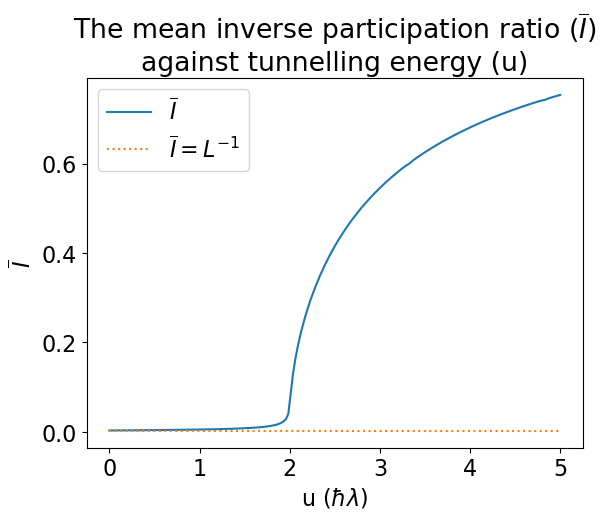

In [19]:
# For alpha = (1 + sqrt(5))/2
a = (1 + np.sqrt(5))/2

u_list = np.linspace(0, 5, 200)

IPR_list = np.array([])

# Find the IPR and mean IPR
def IPR(psi):
    result = 0
    for i in range(len(psi)):
        result += np.abs(psi[i])**4
    return result

def meanIPR(psis):
    result = 0
    for i in range(len(psis)):
        result += IPR(psis[i])
    return result/len(psis)

for u in u_list:
    hamiltonian = tight_binding(1, u, a, L)

    # Find the eigenvalues and eigenvectors
    vals, vecs = np.linalg.eig(hamiltonian)

    # Sort the eigenvalues in increasing order
    inds = np.argsort(vals)
    vals = vals[inds]
    vecs = vecs[:,inds]

    IPR_list = np.append(IPR_list, meanIPR(vecs))

plt.plot(u_list, IPR_list, label=r'$\overline{I}$')
plt.plot(u_list, 1/L*np.ones(len(u_list)), linestyle=':', label=r'$\overline{I} = L^{-1}$')
plt.xlabel(r'u ($\hbar\lambda$)')
plt.ylabel(r'$\overline{I}$')
plt.title(r'The mean inverse participation ratio ($\overline{I}$)''\nagainst tunnelling energy (u)')
plt.legend()

In [20]:
# Forward difference between consecutive values of the mean IPR to find u_c
diff = np.array([])
for i in range(len(IPR_list)-1):
    diff = np.append(diff, IPR_list[i+1]-IPR_list[i])

max_difference = np.where(diff == max(diff))
print('Greatest difference between consecutive values of the mean IPR occurs when u = '+str(u_list[max_difference]))

Greatest difference between consecutive values of the mean IPR occurs when u = [2.01005025]


Plot an example of the spatial probability distribution for an eigenstate in the extended phase, and compare it with the probability distribution for an eigenstate in the localised phase.

489


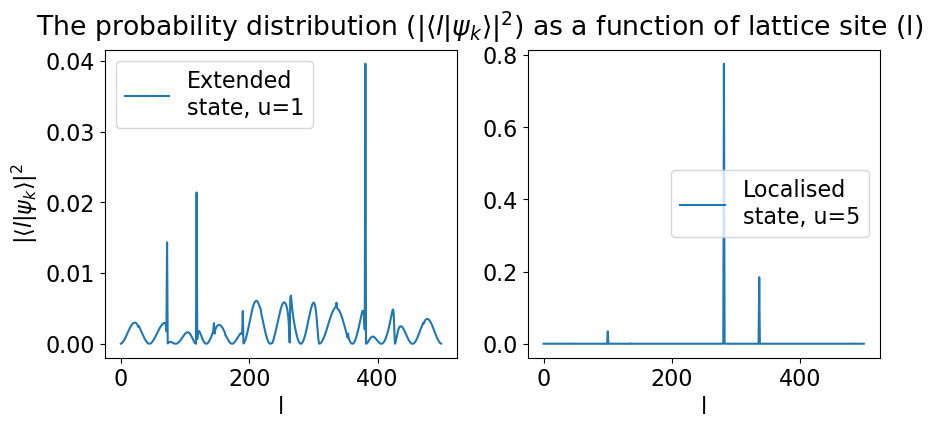

In [28]:
## For u = 1 (extended state)
a = (1 + np.sqrt(5))/2
u = 1
hamiltonian_extended = tight_binding(1, u, a, L)

vals_extended, vecs_extended = np.linalg.eig(hamiltonian_extended)

# Sort the eigenvalues in increasing order
inds = np.argsort(vals_extended)
vals_extended = vals_extended[inds]
vecs_extended = vecs_extended[:,inds]

## For u = 5 (localised state)
u = 5
hamiltonian_localised = tight_binding(1, u, a, L)

vals_localised, vecs_localised = np.linalg.eig(hamiltonian_localised)

# Sort the eigenvalues in increasing order
inds = np.argsort(vals_localised)
vals_localised = vals_localised[inds]
vecs_localised = vecs_localised[:,inds]

## Plotting
# choose a random eigenvector for each (but same relative number)
choice = np.random.randint(0,L)
vec_extended = vecs_extended[choice]
vec_localised = vecs_localised[choice]

print(choice)

l = np.arange(0, L, 1)

fig, ax = plt.subplots(1, 2, figsize=(10,4), sharex=True)

ax[0].plot(l, np.abs(vec_extended)**2, label='Extended\nstate, u=1')
ax[1].plot(l, np.abs(vec_localised)**2, label='Localised\nstate, u=5')
ax[0].set_xlabel('l')
ax[1].set_xlabel('l')
ax[0].set_ylabel(r'$|\langle l | \psi_k \rangle |^2$')
fig.suptitle(r'The probability distribution ($|\langle l | \psi_k \rangle |^2$) as a function of lattice site (l)')
ax[0].legend()
ax[1].legend()
plt.show()

**Exercise 3**

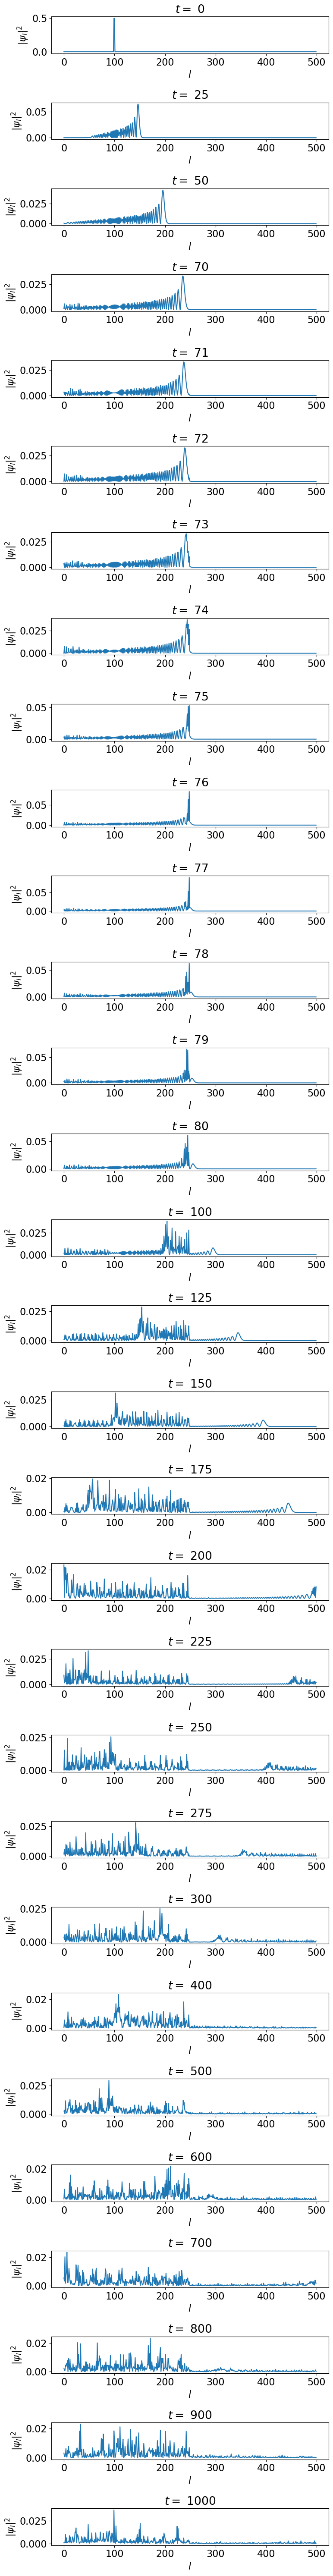

In [30]:
L = 500

# Define a function to generate the Hamiltonian
def impure(tun, u, v, l0, L):
    values = -tun*np.ones(L-1)
    
    l = u*np.ones(L)
    l[l0] = v
    
    H = np.diag(values, 1)
    H += np.diag(values, -1)
    H += np.diag(l, 0)
    return H

# Let lambda = 1, hbar = 1
Hamiltonian = impure(1, 2, 5, 249, L)

Hamiltonian = Hamiltonian.astype(complex)

# Initial condition
psi0 = np.zeros(L).astype(complex)
psi0[99] = 1/np.sqrt(2)
psi0[100] = 1j/np.sqrt(2)

# This is the list of times I generated graphs for intially
# T_list = [0, 25, 50, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 100, 125, 150, 175, 200, 225, 250, 275, 300, 400, 500, 600, 700, 800, 900, 1000]

# This is the list of times which I used graphs of in the report
T_list = [0, 50, 70, 74, 77, 80, 100, 150, 200, 250, 800, 1000]

fig, ax = plt.subplots(len(T_list),1, figsize=(8,2*len(T_list)))

# Solve for the different times and plot
for T in range(len(T_list)):
    time = T_list[T]
    psi = integrate.solve_ivp(lambda t, y: -1j*Hamiltonian@y, (0.0, time), psi0)
    ax[T].plot(np.abs(psi.y[:,-1])**2)
    ax[T].set(title=r'$t =$ '+str(time), ylabel=r'$|\psi_l|^2$', xlabel=r'$l$')
fig.tight_layout()